In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
from tensorflow.python import metrics
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(x_train , y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2622 - accuracy: 0.9248
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1071 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0734 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0536 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0403 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0267 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0210 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.015

In [ ]:
model.save('handwritten.model')

In [ ]:
model = tf.keras.models.load_model('handwritten.model')
loss , accuracy = model.evaluate(x_test , y_test)
print(loss)
print(accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.1151 - accuracy: 0.9750
0.11511159688234329
0.9750000238418579


1/1 [==============================] - 0s 82ms/step
This digit is probably a 5


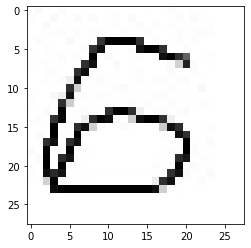

In [ ]:

model = tf.keras.models.load_model('handwritten.model')

cur = 1
while os.path.isfile(f"digits/digit{cur}.jpg"):
    img = cv2.imread(f"digits/digit{cur}.jpg")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0] , cmap=plt.cm.binary)
    plt.show()
    cur+=1

